# Fig 6: Infer the posterior over temperatures

In [41]:
%matplotlib inline

In [42]:
import numpy as np
import matplotlib.pylab as plt
import delfi.distribution as dd
import time
from copy import deepcopy
import sys
sys.path.append("../../setup")
sys.path.append("../../simulator")
sys.path.append("../../inference")
sys.path.append("../../visualization")
sys.path.append("../../utils")
sys.path.append("../")

import netio
import viz
import viz_samples_thesis
import viz_samples
import importlib
from compare_samples import get_dist, evaluate_summ_stats
import viz_samples_thesis
import train_utils as tu
import startEndUtils as seu
from find_pyloric import merge_samples, params_are_bounded
import dill as pickle
import matplotlib as mpl

from common import col, svg, samples_nd
from delfi.utils.conditional_density import eval_conditional_density, conditional_correlation, conditional_mutual_information, buildCondCovMatrix, partialCorrelation

date_today = '1908208'

PANEL_A1 = 'svg/panel_a1.svg'
PANEL_A2 = 'svg/panel_a2.svg'
PANEL_A3 = 'svg/panel_a3.svg'
PANEL_A4 = 'svg/panel_a4.svg'
PANEL_A5 = 'svg/panel_a5.svg'

PANEL_B1 = 'svg/panel_b1.svg'
PANEL_B2 = 'svg/panel_b2.svg'
PANEL_B3 = 'svg/panel_b3.svg'
PANEL_B4 = 'svg/panel_b4.svg'
PANEL_B5 = 'svg/panel_b5.svg'

PANEL_C1 = 'svg/panel_c1.svg'
PANEL_C2 = 'svg/panel_c2.svg'
PANEL_C3 = 'svg/panel_c3.svg'
PANEL_C4 = 'svg/panel_c4.svg'
PANEL_C5 = 'svg/panel_c5.svg'

PANEL_D1 = 'svg/panel_d1.svg'
PANEL_D2 = 'svg/panel_d2.svg'
PANEL_D3 = 'svg/panel_d3.svg'
PANEL_D4 = 'svg/panel_d4.svg'
PANEL_D5 = 'svg/panel_d5.svg'

PANEL_X1 = 'svg/panel_x1.svg'
PANEL_X2 = 'svg/panel_x2.svg'
PANEL_X3 = 'svg/panel_x3.svg'

presentation_path = '../../thesis_presentation/figs/'
figure_num = 'fig6_'

#PANEL_C2 = 'svg/panel_c2.svg'
#PANEL_C3 = 'svg/panel_c3.svg'
#PANEL_C4 = 'svg/panel_c4.svg'

PANEL_suppA = 'svg/panel_supp_a.svg'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
params = netio.load_setup("collect_31D_paper")

In [44]:
date_today = '190807'
import dill as pickle
with open('../../thesis_results/temperature/nets/R1_11deg/191031_204070samples_seed1_Exper11deg_larger.pkl', 'rb') as file:
    inf_SNPE_MAF_11, log, params_11 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R2_15deg/191031_016_seed1_Exper15deg.pkl', 'rb') as file:
    inf_SNPE_MAF_15, log, params_15 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R3_19deg/191103_seed1_Exper19deg.pkl', 'rb') as file:
    inf_SNPE_MAF_19, log, params_19 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R4_23deg/191106_seed1_Exper23deg.pkl', 'rb') as file:
    inf_SNPE_MAF_23, log, params_23 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R5_27deg/191112_seed1_Exper27deg.pkl', 'rb') as file:
    inf_SNPE_MAF_27, log, params_27 = pickle.load(file)

In [45]:
prior = netio.create_prior(params, log=True)
dimensions_11 = np.sum(params.use_membrane) + 7
lims_11 = np.asarray([-np.sqrt(3)*np.ones(dimensions_11), np.sqrt(3)*np.ones(dimensions_11)]).T 
dimensions_15 = np.sum(params.use_membrane) + 7 + 15
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

In [46]:
samples_MAF_11 = merge_samples("../../thesis_results/temperature/samples/R1_11deg/02_posterior_samples", name='conductance_params')
samples_MAF_11 = np.reshape(samples_MAF_11, (500*2520, 31))

samples_MAF_15 = merge_samples("../../thesis_results/temperature/samples/R2_15deg/02_posterior_samples", name='conductance_params')
samples_MAF_15 = np.reshape(samples_MAF_15, (500*2520, 46))

samples_MAF_19 = merge_samples("../../thesis_results/temperature/samples/R3_19deg/02_posterior_samples", name='conductance_params')
samples_MAF_19 = np.reshape(samples_MAF_19, (500*2520, 46))

samples_MAF_23 = merge_samples("../../thesis_results/temperature/samples/R4_23deg/02_posterior_samples", name='conductance_params')
samples_MAF_23 = np.reshape(samples_MAF_23, (500*2520, 46))

samples_MAF_27 = merge_samples("../../thesis_results/temperature/samples/R5_27deg/02_posterior_samples", name='conductance_params')
samples_MAF_27 = np.reshape(samples_MAF_27, (500*2520, 46))

### Load data

In [47]:
prior = netio.create_prior(params, log=True)
params_mean = prior.mean
params_std = prior.std
import train_utils as tu

params = netio.load_setup('train_31D_15deg_R1_paper')
prior_41D = netio.create_prior(params, log=True)
summstats_experimental_11 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0049_11.npz')['summ_stats']
summstats_experimental_15 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0056_15.npz')['summ_stats']
summstats_experimental_19 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0059_19.npz')['summ_stats']
summstats_experimental_23 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0063_23.npz')['summ_stats']
summstats_experimental_27 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0069_27.npz')['summ_stats']
params = netio.load_setup("collect_31D_paper")

In [48]:
posterior_MAF_11 = inf_SNPE_MAF_11.predict([summstats_experimental_11])
posterior_MAF_15 = inf_SNPE_MAF_15.predict([summstats_experimental_15])
posterior_MAF_19 = inf_SNPE_MAF_19.predict([summstats_experimental_19])
posterior_MAF_23 = inf_SNPE_MAF_23.predict([summstats_experimental_23])
posterior_MAF_27 = inf_SNPE_MAF_27.predict([summstats_experimental_27])

# Panel A: Traces to infer

### 11 degree

In [79]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0049.npz')
t = npz['t']
t_11 = t
PD_spikes_11 = npz['PD_spikes']
LP_spikes_11 = npz['LP_spikes']
PY_spikes_11 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

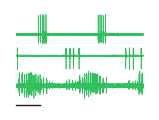

In [80]:
counter = 0

start_index = 219500 + 2100
end_index   = 246500 + 2100  # 32000
height_offset = 200
shown_t = t[end_index] - t[start_index]
dt = t[1] - t[0]

height_offset = 200

with mpl.rc_context(fname='../matplotlibrc.txt'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_11[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_11[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_11[:end_index-start_index], 5+pyn[:end_index-start_index]*1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_11[:end_index-start_index], 2.5+PD_spikes_11[:end_index-start_index], c=col['GT'])
    #plt.plot(t_11[:end_index-start_index], 1.25+LP_spikes_11[:end_index-start_index], c=col['GT'])
    #plt.plot(t_11[:end_index-start_index], PY_spikes_11[:end_index-start_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[0], t[number_of_timesteps], 2)
    ax.plot(t_scale, 4.0 * np.ones_like(t_scale), c='k', lw=1.0)

    plt.savefig(presentation_path+figure_num+PANEL_A1[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

### 15 degree

In [81]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0056.npz')
t_15 = npz['t']
PD_spikes_15 = npz['PD_spikes']
LP_spikes_15 = npz['LP_spikes']
PY_spikes_15 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

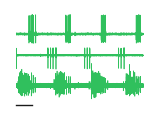

In [82]:
counter = 0

start_index = 60000
end_index   = 100000
height_offset = 200

with mpl.rc_context(fname='../matplotlibrc.txt'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_15[:end_index-start_index], 5+2.5+pdn[start_index:end_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_15[:end_index-start_index], 5+1.45+lpn[start_index:end_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_15[:end_index-start_index], 5+pyn[start_index:end_index]*1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[0], t[number_of_timesteps], 2)
    ax.plot(t_scale, 4.0 * np.ones_like(t_scale), c='k', lw=1.0)

    plt.savefig(presentation_path+figure_num+PANEL_A2[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

# 19 degree

In [83]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0059.npz')
t_19 = npz['t']
PD_spikes_19 = npz['PD_spikes']
LP_spikes_19 = npz['LP_spikes']
PY_spikes_19 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

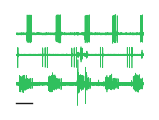

In [84]:
counter = 0

start_index = 100000
end_index   = 140000
height_offset = 200

with mpl.rc_context(fname='../matplotlibrc.txt'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_19[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_19[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_19[:end_index-start_index], 5+pyn[:end_index-start_index]*1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[0], t[number_of_timesteps], 2)
    ax.plot(t_scale, 4.0 * np.ones_like(t_scale), c='k', lw=1.0)

    plt.savefig(presentation_path+figure_num+PANEL_A3[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

### 23 degree

In [85]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0063.npz')
t_23 = npz['t']
PD_spikes_23 = npz['PD_spikes']
LP_spikes_23 = npz['LP_spikes']
PY_spikes_23 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

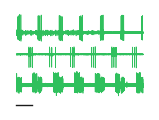

In [86]:
counter = 0

start_index = 100000
end_index   = 140000
height_offset = 200

with mpl.rc_context(fname='../matplotlibrc.txt'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_23[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_23[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_23[:end_index-start_index], 5+pyn[:end_index-start_index]*1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[0], t[number_of_timesteps], 2)
    ax.plot(t_scale, 4.0 * np.ones_like(t_scale), c='k', lw=1.0)

    plt.savefig(presentation_path+figure_num+PANEL_A4[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

### 27 degree

In [87]:
npz = np.load('../../results/experimental/traces/857_016/data_857_016_0069.npz')
t_27 = npz['t']
PD_spikes_27 = npz['PD_spikes']
LP_spikes_27 = npz['LP_spikes']
PY_spikes_27 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

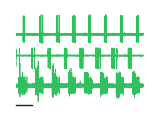

In [88]:
counter = 0

start_index = 100000
end_index   = 140000
height_offset = 200

with mpl.rc_context(fname='../matplotlibrc.txt'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_27[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_27[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_27[:end_index-start_index], 5+pyn[:end_index-start_index]*1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[0], t[number_of_timesteps], 2)
    ax.plot(t_scale, 4.0 * np.ones_like(t_scale), c='k', lw=1.0)

    plt.savefig(presentation_path+figure_num+PANEL_A5[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

# Panel B: Posteriors

In [89]:
labels_ = viz.get_labels_8pt(params)
labels_[9] += ''

In [91]:
from decimal import Decimal
all_labels = []
for dim_i in range(31):
    if dim_i > len(params_mean) - 7.5: # synapses
        if dim_i == 24: all_labels.append([r'$\mathdefault{0.01}$   ', r'$\mathdefault{10000}\;\;\;\;$   '])
        else: all_labels.append([r'$\;\;\mathdefault{0.01}$', r'$\mathdefault{1000}\;\;\;\;$ '])
    else: # membrane conductances
        num_after_digits = -int(np.log10(lims[dim_i, 1] * params_std[dim_i] + params_mean[dim_i]))
        if num_after_digits > 2:
            num_after_digits=2
        labels = [round(Decimal((lims[dim_i, num_tmp] * params_std[dim_i] + params_mean[dim_i]) / 0.628e-3), num_after_digits)
                  for num_tmp in range(2)]
        new_labels = []
        counter=0
        for l in labels:
            if counter == 0:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;$ ')
            else:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;\;\;$  ')
            counter+=1
        all_labels.append(new_labels)

../common.py:593: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts['labels'] == [] or opts['labels'] is None:


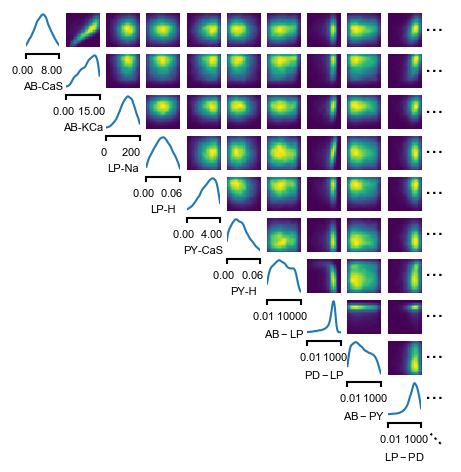

In [92]:
samples_MAF_ = samples_MAF_11[:10000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(samples=[samples_MAF_],
                           subset=[2,4,8,14,18,22,24,25,26,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.3,17.0*0.3),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
    plt.savefig(presentation_path+figure_num+PANEL_B1[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

../common.py:593: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts['labels'] == [] or opts['labels'] is None:


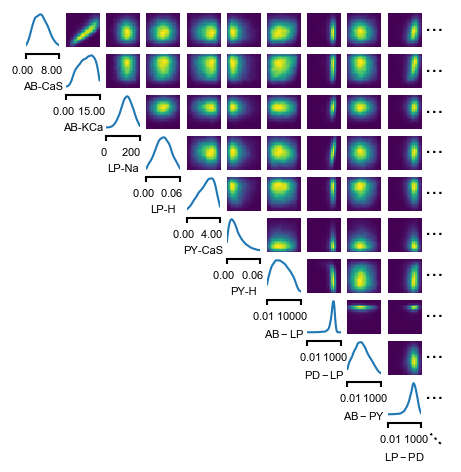

In [93]:
samples_MAF_ = samples_MAF_15[:10000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(samples=[samples_MAF_],
                           subset=[2,4,8,14,18,22,24,25,26,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.3,17.0*0.3),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
                           #plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]}),
    plt.savefig(presentation_path+figure_num+PANEL_B2[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

../common.py:593: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts['labels'] == [] or opts['labels'] is None:


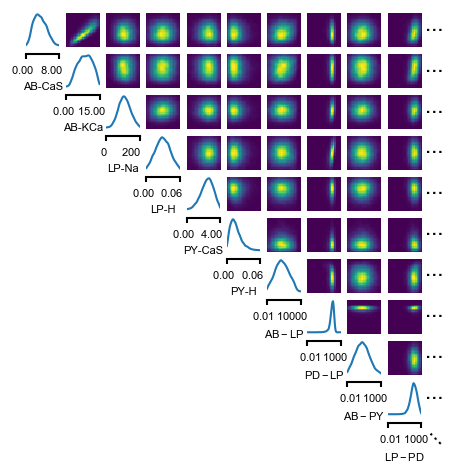

In [94]:
samples_MAF_ = samples_MAF_19[:10000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(samples=[samples_MAF_],
                           subset=[2,4,8,14,18,22,24,25,26,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.3,17.0*0.3),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
    plt.savefig(presentation_path+figure_num+PANEL_B3[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

../common.py:593: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts['labels'] == [] or opts['labels'] is None:


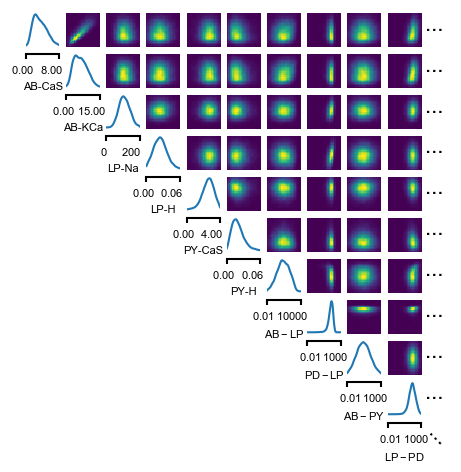

In [95]:
samples_MAF_ = samples_MAF_23[:10000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(samples=[samples_MAF_],
                           subset=[2,4,8,14,18,22,24,25,26,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.3,17.0*0.3),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
    plt.savefig(presentation_path+figure_num+PANEL_B4[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

../common.py:593: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts['labels'] == [] or opts['labels'] is None:


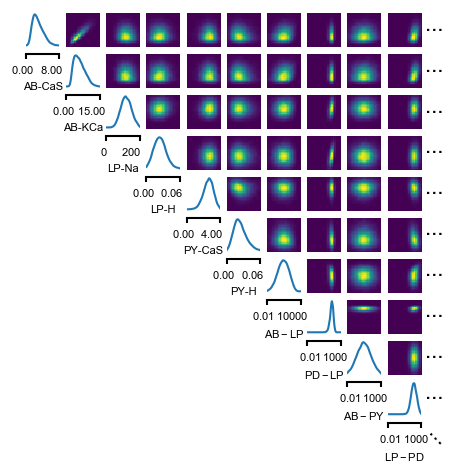

In [96]:
samples_MAF_ = samples_MAF_27[:10000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(samples=[samples_MAF_],
                           subset=[2,4,8,14,18,22,24,25,26,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.3,17.0*0.3),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
    plt.savefig(presentation_path+figure_num+PANEL_B5[4:-4]+'.png', bbox_inches='tight', dpi=300)

    plt.show()

# Panel C: samples from posterior

In [26]:
prior_15 = netio.create_prior(params_15, log=True)
dimensions_15 = np.sum(params_11.use_membrane) + 7 + 15
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

labels_ = viz.get_labels(params_15)
prior_normalized = dd.Uniform(-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15), seed=params_15.seed)

params_11 = deepcopy(params_15)

params_mean_15 = prior_15.mean
params_std_15 = prior_15.std

### 11 degree

In [27]:
params_11.model_params['temp'] = 283
pyloric_sim_11 = netio.create_simulators(params_11)
summ_stats_11 = netio.create_summstats(params_11)

ss [1.40855714e+03 2.47659375e+02 2.30042857e+02 2.49264286e+02
 4.70292857e+02 3.35071429e+01 7.35875000e+02 9.99425000e+02
 1.75824869e-01 1.63318086e-01 1.76964269e-01 3.33882697e-01
 2.37882737e-02 5.22431769e-01 7.09538129e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


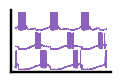

ss [1.32309167e+03 1.70375000e+02 1.98303125e+02 3.77475000e+02
 4.69245833e+02 6.71541667e+01 6.39979167e+02 9.11504167e+02
 1.28770367e-01 1.49878599e-01 2.85297693e-01 3.54658596e-01
 5.07554906e-02 4.83699794e-01 6.88919891e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


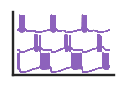

In [28]:
num_samples = 2
time_len = int((end_index - start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
counter = 0
    
for counter in range(num_samples):
    fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
    params1 = samples_MAF_27[2+counter]
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = pyloric_sim_11[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = summ_stats_11.calc([out_target])[0]
    print('ss', ss)
    
    ax = viz_samples.vis_sample_plain(pyloric_sim_11[0], summ_stats_11, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, case='high_p', col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
                                 title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
    if counter == 0: plt.savefig(presentation_path+figure_num+PANEL_C1[4:-4]+'.png', bbox_inches='tight', dpi=300)
    if counter == 1: plt.savefig(presentation_path+figure_num+PANEL_D1[4:-4]+'.png', bbox_inches='tight', dpi=300)
    plt.show()

In [29]:
params_15.model_params['temp'] = 287

In [30]:
pyloric_sim_15 = netio.create_simulators(params_15)
summ_stats_15 = netio.create_summstats(params_15)

ss [1.08587500e+03 1.94611111e+02 1.78119444e+02 1.81711111e+02
 3.79015625e+02 3.60781250e+01 5.76350000e+02 7.83368750e+02
 1.79220547e-01 1.64033102e-01 1.67340726e-01 3.49041671e-01
 3.32249338e-02 5.30770116e-01 7.21417060e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


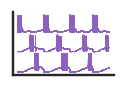

ss [1.03724063e+03 1.49491667e+02 1.64852500e+02 2.58460000e+02
 3.76771875e+02 3.18593750e+01 5.28300000e+02 7.32206250e+02
 1.44124385e-01 1.58933709e-01 2.49180367e-01 3.63244426e-01
 3.07155102e-02 5.09332152e-01 7.05917443e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


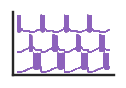

In [31]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
    params1 = samples_MAF_27[2+counter]
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = pyloric_sim_15[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = summ_stats_11.calc([out_target])[0]
    print('ss', ss)
    
    ax = viz_samples.vis_sample_plain(pyloric_sim_15[0], summ_stats_15, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, case='high_p', col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
                                 title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
    if counter == 0: plt.savefig(presentation_path+figure_num+PANEL_C2[4:-4]+'.png', bbox_inches='tight', dpi=300)
    if counter == 1: plt.savefig(presentation_path+figure_num+PANEL_D2[4:-4]+'.png', bbox_inches='tight', dpi=300)
    plt.show()

In [32]:
params_19.model_params['temp'] = 291
pyloric_sim_19 = netio.create_simulators(params_19)
summ_stats_19 = netio.create_summstats(params_19)

ss [8.51486364e+02 1.40420833e+02 1.27743750e+02 1.49508333e+02
 3.10795455e+02 3.44500000e+01 4.50304545e+02 6.19597727e+02
 1.64912604e-01 1.50024423e-01 1.75585118e-01 3.65003443e-01
 4.04586632e-02 5.28845281e-01 7.27666060e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


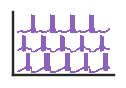

ss [8.43788636e+02 1.26070833e+02 1.35420833e+02 1.96027083e+02
 3.10784091e+02 3.28409091e+01 4.38250000e+02 6.08381818e+02
 1.49410442e-01 1.60491416e-01 2.32317757e-01 3.68319835e-01
 3.89207767e-02 5.19383624e-01 7.21012102e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


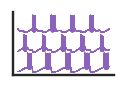

In [33]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
    params1 = samples_MAF_27[2+counter]
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = pyloric_sim_19[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = summ_stats_11.calc([out_target])[0]
    print('ss', ss)
    
    ax = viz_samples.vis_sample_plain(pyloric_sim_19[0], summ_stats_19, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, case='high_p', col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
                                 title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
    if counter == 0: plt.savefig(presentation_path+figure_num+PANEL_C3[4:-4]+'.png', bbox_inches='tight', dpi=300)
    if counter == 1: plt.savefig(presentation_path+figure_num+PANEL_D3[4:-4]+'.png', bbox_inches='tight', dpi=300)
    plt.show()

In [34]:
params_23.model_params['temp'] = 295
pyloric_sim_23 = netio.create_simulators(params_23)
summ_stats_23 = netio.create_summstats(params_23)

ss [6.67762500e+02 9.50216667e+01 1.18730000e+02 1.07396667e+02
 2.49378571e+02 2.68821429e+01 3.45567857e+02 4.91407143e+02
 1.42298597e-01 1.77802737e-01 1.60830635e-01 3.73453992e-01
 4.02570418e-02 5.17501143e-01 7.35901077e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


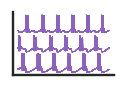

ss [6.96216071e+02 1.17148333e+02 1.24367857e+02 1.50198333e+02
 2.48364286e+02 1.73428571e+01 3.67987500e+02 5.09698214e+02
 1.68264334e-01 1.78633993e-01 2.15735229e-01 3.56734491e-01
 2.49101649e-02 5.28553584e-01 7.32097743e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


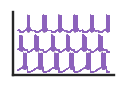

In [35]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False

for counter in range(num_samples):
    fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
    params1 = samples_MAF_27[2+counter]
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = pyloric_sim_23[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = summ_stats_11.calc([out_target])[0]
    print('ss', ss)
    
    ax = viz_samples.vis_sample_plain(pyloric_sim_23[0], summ_stats_23, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, case='high_p', col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
                                 title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
    if counter == 0: plt.savefig(presentation_path+figure_num+PANEL_C4[4:-4]+'.png', bbox_inches='tight', dpi=300)
    if counter == 1: plt.savefig(presentation_path+figure_num+PANEL_D4[4:-4]+'.png', bbox_inches='tight', dpi=300)
    plt.show()

In [36]:
params_27.model_params['temp'] = 299
pyloric_sim_27 = netio.create_simulators(params_27)
summ_stats_27 = netio.create_summstats(params_27)

ss [5.27694444e+02 6.82263158e+01 9.01078947e+01 9.30250000e+01
 2.01863889e+02 3.00180556e+01 2.69727778e+02 3.90034722e+02
 1.29291329e-01 1.70757710e-01 1.76285729e-01 3.82539348e-01
 5.68852977e-02 5.11143865e-01 7.39129863e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


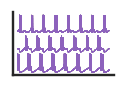

ss [5.54223529e+02 9.80777778e+01 9.57638889e+01 1.08204167e+02
 2.03092647e+02 1.88897059e+01 2.99829412e+02 4.14248529e+02
 1.76964298e-01 1.72789288e-01 1.95235606e-01 3.66445371e-01
 3.40831900e-02 5.40990044e-01 7.47439449e-01 2.50000000e+00
 2.50000000e+00 2.50000000e+00 1.00000000e+00]


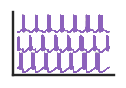

In [37]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False

for counter in range(num_samples):
    fig, ax = plt.subplots(1,1,figsize=(1.8,1.15))
    params1 = samples_MAF_27[2+counter]
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = pyloric_sim_27[0].gen_single(deepcopy(target_params), seed_sim=True, to_seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = summ_stats_11.calc([out_target])[0]
    print('ss', ss)
    
    ax = viz_samples.vis_sample_plain(pyloric_sim_27[0], summ_stats_27, target_params, voltage_trace=out_target, test_idx=[0], axV=ax, col=[col['CONSISTENT1'], col['CONSISTENT1'], col['CONSISTENT1']], case='high_p', time_len=time_len, fontscale=1.2, show_xaxis=show_xaxis, linescale=1.2, legend=False, offset=20000,
                                 title='Sample along the path of high probability in Prinz format', date_today='190705_posterior_samples_experimental', counter=0, save_fig=False)
    if counter == 0: plt.savefig(presentation_path+figure_num+PANEL_C5[4:-4]+'.png', bbox_inches='tight', dpi=300)
    if counter == 1: plt.savefig(presentation_path+figure_num+PANEL_D5[4:-4]+'.png', bbox_inches='tight', dpi=300)
    plt.show()